# The Payroll Protection Program and the Well-Being of Young Children
*By Gustave Muhoza*

## I. Introduction 

Public spending is a good indication of what societies value. In this notebook, I analyze the case of the Paycheck Protection Program (PPP) to determine whether loan disbursement under this program demonstrate concern for the well-being of vulnerable children. My goal here is to answer the following: "Are PPP loans distributed to areas where children need support the most?" Answering this question is important in 1) giving a picture of how the society values the most vulnerable children, 2) providing useful recommendations for children-centered policies.

In the first part of the analysis, my objective was to aquire data from different sources to compliment the PPP data provided by the US Small Business Administration. After browsing the PPP data, I decided that in order to get a more complete picture in terms of PPP impact on children's life, I needed to acquire the following population data from the US Census Bureau:

- poverty data by county
- children data by county

These data include geocodes that were intended for mapping and visualizing areas of need compared to the loans received.

The second part of my analysis consisted of preprocessing the data. In the process, I discovered significant shortcomings in the PPP data. First, the data contains many errors including hard to understand data (e.g., 1-dollar loans) and many missing values for key data such as industry codes (e.g., missing NAICSCode). Preliminary data summary table in the data cleaning sections shows that for most of the variables, the most frequent value was an indication of 'missing' value such as "NaN" or "Unanswered". 

In view of my initial intention for this project, the most important shortfall of the PPP data was the lack of geographical breakdown at the county level. The data is provided by zip codes, which makes it difficult (although not impossible) to map loan disbursements by county. I spent a significant part of this project time researching a solution for creating geographical coordinates for mapping purposes. Although I was not successful in my attempt, finding a solution for this problem will be important for future analysis. Nonetheless, from this data exploration, it was clear that **the the Paycheck Protection Program Flexibility Act of 2020 (PPP Act) should be amended to enhance reporting requirements, data integrity and data accuracy**. 

After acquiring the population and poverty data by county, I returned to the PPP data. Using the available data, I compared the loans received by Child Care Services organizations. A quick look at the data shows that although PPP loans to childcare services organizations had were more evenly distributed and had no outliers that indicate more questions than answers, the distribution just like the general industry distribution, data is not evenly distribution. Instead, the data was positively skewed indicating that more loans received were above the average and towards the $150000 maximum in the data select for this analysis. This is positive news. **Congress should encode provisions to maintain and increase such support for organizations that serve children, especially vulnerable children.**

### **Key Policy Recommendation Summary**:

-	Amend the PPP Act to improve reporting, data integrity and data accuracy
-	Add new provisions the PPP Act to enhance targeting and be more intentional in targeting areas with the greatest number of children in need

### **Recommendations for further analysis**
-	Use geospatial analysis to monitor the impact of the PPP program for children
-	Perform further work to analyze the data in terms of several factors including poverty level, geographical location, and number of children in areas receiving loans using regression analysis
-	Use machine learning techniques to enhance visualization and automation for future reports
-	Build on the population and poverty data already collected below and combine with location data (e.g., from Foursquare, Bing, Google) to show whether PPP loans are having impact on keeping childcare services businesses open where they are needed most.


In [4]:
#Import some preliminary libraries I believe will be needed later
import pandas as pd
import numpy as np

#Import Matplotlib and apply some of the styling from ggpolot

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style


print ("Import successful")

Import successful


### II. PPP Data for the State of Virginia

In [47]:
# The code was removed by Watson Studio for sharing.

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149990.0,NORFOLK,VA,23502,541110.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,10.0,4/10/2020,"Bank of America, National Association",VA - 02
1,149985.0,RICHMOND,VA,23224,541990.0,Partnership,Unanswered,Unanswered,Unanswered,NaN,12.0,4/15/2020,Manufacturers and Traders Trust Company,VA - 03
2,149932.2,HENRICO,VA,23294,713940.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,NaN,4/27/2020,The Freedom Bank of Virginia,VA - 07
3,149914.0,VIRGINIA BEACH,VA,23457,238220.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,5/3/2020,"Wells Fargo Bank, National Association",VA - 02
4,149900.0,ALDIE,VA,20105,621320.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,15.0,4/10/2020,Sandy Spring Bank,VA - 10


In [6]:
df_data_1.tail()

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
93044,20.0,GREAT FALLS,VA,22066,541511.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,1.0,5/2/2020,"Bank of America, National Association",VA - 10
93045,18.0,ASHBURN,VA,20147,541618.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,2.0,5/3/2020,"Bank of America, National Association",VA - 10
93046,8.0,VIRGINIA BEACH,VA,23462,561790.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,13.0,5/3/2020,"Bank of America, National Association",VA - 02
93047,3.0,MCLEAN,VA,22102,541990.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,1.0,5/7/2020,Arlington Community FCU,VA - 08
93048,1.0,ALEXANDRIA,VA,20176,511110.0,Independent Contractors,Unanswered,Unanswered,Unanswered,NaN,0.0,5/6/2020,"TD Bank, National Association",VA - 10


#### II. a. Preliminary PPP Data Summary

In [7]:
#Summarize the data for important statististics

df_data_1.describe(include='all')

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
count,93049.000000,93049,93049,93049.000000,91792.000000,93036,93049,93049,93049,4043,88027.000000,93049,93049,93049
unique,NaN,1229,1,NaN,NaN,17,6,3,3,1,NaN,79,683,18
top,NaN,VIRGINIA BEACH,VA,NaN,NaN,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,Y,NaN,4/28/2020,Atlantic Union Bank,VA - 10
freq,NaN,5258,93049,NaN,NaN,31242,86952,77564,83389,4043,NaN,9662,8364,14535
mean,35214.586100,NaN,NaN,22699.000398,556643.757964,NaN,NaN,NaN,NaN,NaN,4.070297,NaN,NaN,NaN
std,33871.574225,NaN,NaN,1261.613783,183108.734146,NaN,NaN,NaN,NaN,NaN,9.386590,NaN,NaN,NaN
min,1.000000,NaN,NaN,3801.000000,111110.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,10560.000000,NaN,NaN,22153.000000,453920.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,21250.000000,NaN,NaN,23030.000000,541611.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,49100.000000,NaN,NaN,23464.000000,713915.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN


#### II.b. Data Cleaning

In [8]:
#Drop the nan LoanAmounts and NAICSCodes
daf_data2 = df_data_1.dropna(how='any', subset=['LoanAmount', 'NAICSCode'])
daf_data2

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149990.00,NORFOLK,VA,23502,541110.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,10.0,4/10/2020,"Bank of America, National Association",VA - 02
1,149985.00,RICHMOND,VA,23224,541990.0,Partnership,Unanswered,Unanswered,Unanswered,NaN,12.0,4/15/2020,Manufacturers and Traders Trust Company,VA - 03
2,149932.20,HENRICO,VA,23294,713940.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,NaN,4/27/2020,The Freedom Bank of Virginia,VA - 07
3,149914.00,VIRGINIA BEACH,VA,23457,238220.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,5/3/2020,"Wells Fargo Bank, National Association",VA - 02
4,149900.00,ALDIE,VA,20105,621320.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,15.0,4/10/2020,Sandy Spring Bank,VA - 10
5,149900.00,CHARLOTTESVILLE,VA,22903,812320.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,22.0,4/27/2020,"Blue Ridge Bank, National Association",VA - 05
6,149900.00,HARRISONBURG,VA,22802,624229.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,28.0,4/14/2020,"Summit Community Bank, Inc.",VA - 06
7,149900.00,SALEM,VA,24153,484230.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,0.0,4/9/2020,"Newtek Small Business Finance, Inc.",VA - 06
8,149882.00,FAIRFAX,VA,22030,621399.0,Subchapter S Corporation,White,Male Owned,Unanswered,NaN,7.0,4/28/2020,FVCbank,VA - 10
9,149800.00,NORFOLK,VA,23513,323111.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,4/9/2020,Towne Bank,VA - 03


In [9]:
#Select relevant columns
new_df = daf_data2[['LoanAmount','City','State', 'Zip','NAICSCode']]

#Confirm by looking at a few lines
new_df.head()

,LoanAmount,City,State,Zip,NAICSCode
0,149990.0,NORFOLK,VA,23502,541110.0
1,149985.0,RICHMOND,VA,23224,541990.0
2,149932.2,HENRICO,VA,23294,713940.0
3,149914.0,VIRGINIA BEACH,VA,23457,238220.0
4,149900.0,ALDIE,VA,20105,621320.0


In [29]:
#Change the type of NAICSCodes and Zip to Objects
new_df['NAICSCode']= new_df['NAICSCode'].astype(str)
new_df['Zip']=new_df['Zip'].astype(str)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [30]:
# New statistical description after cleaning

new_df.describe()

,LoanAmount
count,91792.000000
mean,35329.516845
std,33934.278860
min,1.000000
25%,10600.000000
50%,21354.000000
75%,49379.500000
max,149990.000000


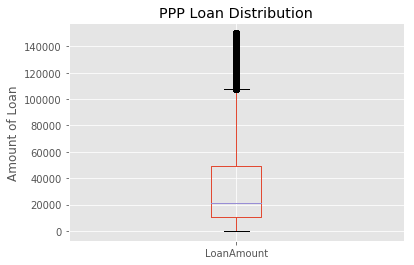

In [45]:
#Use Matplotlib to visualize the data distribution for the loans disbursed using boxplot
new_df.plot(kind='box', figsize=(6, 4))

plt.title('PPP Loan Distribution')
plt.ylabel('Amount of Loan')

plt.show()

#### III.c. Loan award by Industry

In [24]:
#Group by NAICSCode and obtain key aggregations

loan_by_industry = new_df.groupby('NAICSCode').LoanAmount.agg(['sum','median','mean', 'max']).round(2).reset_index()
loan_by_industry.head()

,NAICSCode,sum,median,mean,max
0,111110.0,1274326.62,15450.00,22755.83,124400.0
1,111120.0,32890.00,32890.00,32890.00,32890.0
2,111140.0,167871.46,20000.00,33574.29,81200.0
3,111150.0,1018921.08,17964.35,24260.03,99000.0
4,111191.0,273305.00,21250.00,27330.50,49300.0


#### II.d. Childcare Services

#### How many loans went to Childcare Services organizations and how do these organizations compare? I will use NAICSCode 624410 to find out.

In [42]:
#Filtering by Childcare services
cls_df = new_df[new_df['NAICSCode'] == '624410.0']

#Confirm
cls_df.head()

,LoanAmount,City,State,Zip,NAICSCode
99,148900.0,VIRGINIA BEACH,VA,23462,624410.0
106,148865.0,CHARLOTTESVILLE,VA,22901,624410.0
186,148100.0,FALLS CHURCH,VA,22042,624410.0
242,147600.0,NORTH CHESTERFIELD,VA,23235,624410.0
260,147425.0,NORTH CHESTERFIELD,VA,23235,624410.0


In [43]:
#Examine the size of the new dataframe to get the number of loans that went to childcare services organizations
cls_df.shape

(805, 5)

#### Childcare services in Virginia received 805 loans

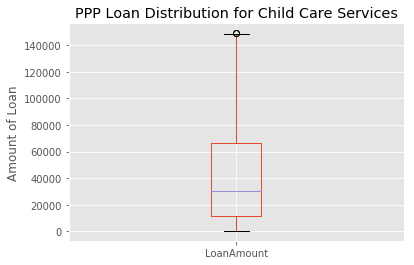

In [46]:
### Below is the distribution of the 805 loans that went to child care services organizations in the Commonwealth
cls_df.plot(kind='box', figsize=(6, 4))

plt.title('PPP Loan Distribution for Child Care Services')
plt.ylabel('Amount of Loan')

plt.show()

In [196]:
#How much money went to different industries?
df_data.groupby(['NAICSCode'], as_index =False).LoanAmount.sum().round(2)

,NAICSCode,LoanAmount
0,111110.0,1274326.62
1,111120.0,32890.00
2,111140.0,167871.46
3,111150.0,1018921.08
4,111191.0,273305.00
5,111199.0,1092662.76
6,111211.0,1012403.00
7,111219.0,747578.60
8,111320.0,20833.00
9,111331.0,1165140.82


### Part III Virginia Children by County

In [22]:
#Exploring population data for the state of Virginia
p_data = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-alldata-51.csv'

#Read the the data into a pandas dataframe
p_data_df = pd.read_csv(p_data)

#Explore a few lines to confirm file data was read

p_data_df.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,51,1,Virginia,Accomack County,1,0,33164,16154,17010,...,1461,1163,63,51,54,53,7,5,13,16
1,50,51,1,Virginia,Accomack County,1,1,1942,993,949,...,208,197,7,9,6,9,1,0,0,5
2,50,51,1,Virginia,Accomack County,1,2,1977,1058,919,...,133,150,9,7,7,6,1,1,1,2
3,50,51,1,Virginia,Accomack County,1,3,1833,978,855,...,125,84,5,3,2,7,4,0,2,0
4,50,51,1,Virginia,Accomack County,1,4,1956,994,962,...,115,95,7,4,4,6,0,1,1,2


For this project, we're interested in the following data by county:
- Latest year or YEAR 12 and children 0 to 4 or AGEGRP 1 according to the documentation 
(https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf)
- We are also interested in total population by age group


In [30]:
# A dataframe with data for children 0 to 4 for the most recent year


va_children_df = p_data_df[(p_data_df.AGEGRP==1)&(p_data_df.YEAR==12)].reset_index(drop=True)

va_children_df.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,51,1,Virginia,Accomack County,12,1,1811,937,874,...,167,161,21,8,10,8,2,2,2,2
1,50,51,3,Virginia,Albemarle County,12,1,5721,2913,2808,...,282,279,29,27,17,11,11,12,1,0
2,50,51,5,Virginia,Alleghany County,12,1,650,326,324,...,5,5,0,0,1,0,0,0,0,0
3,50,51,7,Virginia,Amelia County,12,1,724,392,332,...,18,19,1,4,1,1,2,1,0,0
4,50,51,9,Virginia,Amherst County,12,1,1638,861,777,...,26,18,2,3,0,2,0,0,1,0


In [31]:
#Confirm that all counties are accounted for
va_children_df.shape


(133, 80)

### Poverty by County

In [36]:
#Obtain household poverty data from the U.S. Census Bureau

income_url= 'https://www2.census.gov/programs-surveys/saipe/datasets/2018/2018-state-and-county/est18all.xls'

#Extract income information, picking only useful rows

usa_poverty_df = pd.read_excel(income_url,
                       skiprows=range(3),
                       skipfooter=193,
                       header=0,          
                      )
#Display a few rows to confirm

usa_poverty_df.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,41852315,41619366,42085264,13.1,13,13.2,...,17.2,61937,61843,62031,3758704,3714862,3802546,19.5,19.3,19.7
1,1,0,AL,Alabama,801758,785668,817848,16.8,16.5,17.1,...,23.7,49881,49123,50639,73915,69990,77840,26,24.6,27.4
2,1,1,AL,Autauga County,7587,6334,8840,13.8,11.5,16.1,...,23.9,59338,53628,65048,.,.,.,.,.,.
3,1,3,AL,Baldwin County,21069,17390,24748,9.8,8.1,11.5,...,16.9,57588,54437,60739,.,.,.,.,.,.
4,1,5,AL,Barbour County,6788,5662,7914,30.9,25.8,36,...,45.9,34382,31157,37607,.,.,.,.,.,.


In [42]:
#Dataframe with poverty data filtered to Virginia

va_poverty_df = usa_poverty_df[usa_poverty_df['Postal Code']=='VA'].reset_index(drop=True)

va_poverty_df.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,51,0,VA,Virginia,884898,865159,904637,10.7,10.5,10.9,...,13.5,72600,71931,73269,75718,70578,80858,15.2,14.2,16.2
1,51,1,VA,Accomack County,5552,4388,6716,17.3,13.7,20.9,...,33.8,42879,39027,46731,.,.,.,.,.,.
2,51,3,VA,Albemarle County,8912,7401,10423,8.7,7.2,10.2,...,10,80392,73819,86965,.,.,.,.,.,.
3,51,5,VA,Alleghany County,2164,1774,2554,14.8,12.1,17.5,...,23.9,46538,41900,51176,.,.,.,.,.,.
4,51,7,VA,Amelia County,1273,981,1565,9.9,7.6,12.2,...,15.8,57280,51262,63298,.,.,.,.,.,.


In [40]:
#Confirm that all counties are accounted for

va_poverty_df.shape

(134, 31)

In [43]:
#Remove the first row which contains the Commonwealth aggregate numbers
va_poverty_df = va_poverty_df.drop(0, axis =0).reset_index(drop=True)

va_poverty_df

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,51,1,VA,Accomack County,5552,4388,6716,17.3,13.7,20.9,...,33.8,42879,39027,46731,.,.,.,.,.,.
1,51,3,VA,Albemarle County,8912,7401,10423,8.7,7.2,10.2,...,10,80392,73819,86965,.,.,.,.,.,.
2,51,5,VA,Alleghany County,2164,1774,2554,14.8,12.1,17.5,...,23.9,46538,41900,51176,.,.,.,.,.,.
3,51,7,VA,Amelia County,1273,981,1565,9.9,7.6,12.2,...,15.8,57280,51262,63298,.,.,.,.,.,.
4,51,9,VA,Amherst County,3969,3180,4758,13,10.4,15.6,...,22.4,50580,45450,55710,.,.,.,.,.,.
5,51,11,VA,Appomattox County,2123,1707,2539,13.5,10.9,16.1,...,23.6,51131,45807,56455,.,.,.,.,.,.
6,51,13,VA,Arlington County,14842,12326,17358,6.3,5.2,7.4,...,9.6,120950,117298,124602,.,.,.,.,.,.
7,51,15,VA,Augusta County,6531,5264,7798,9,7.2,10.8,...,13.6,60556,56655,64457,.,.,.,.,.,.
8,51,17,VA,Bath County,451,348,554,10.7,8.3,13.1,...,19.3,50564,44947,56181,.,.,.,.,.,.
9,51,19,VA,Bedford County,8162,6785,9539,10.4,8.6,12.2,...,15,61186,56371,66001,.,.,.,.,.,.


In [44]:
#Check the size now to confirm counties
va_poverty_df.shape

(133, 31)